<a href="https://colab.research.google.com/github/giovanimachado/phd-puc/blob/main/Aula13_exercicio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

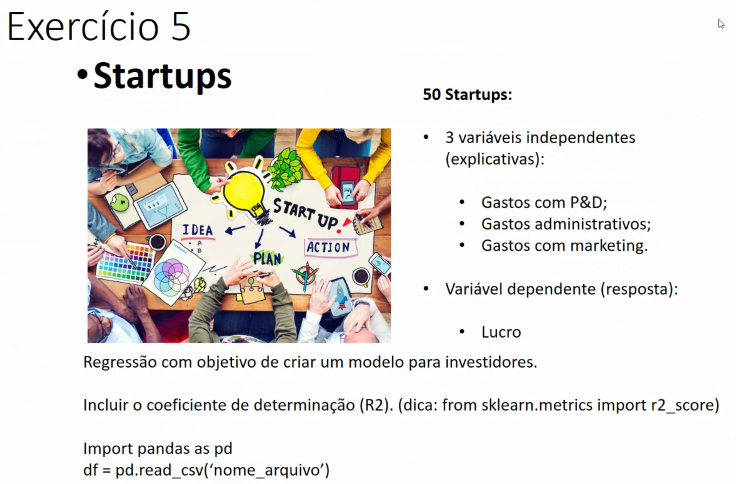

Carregar dados

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
# x = df.iloc[:, 0:3] #other option

#x
x = df[['R&D Spend', 'Administration', 'Marketing Spend']]
x = x.values.tolist()
#x = x.to_numpy()
x

[[165349.2, 136897.8, 471784.1],
 [162597.7, 151377.59, 443898.53],
 [153441.51, 101145.55, 407934.54],
 [144372.41, 118671.85, 383199.62],
 [142107.34, 91391.77, 366168.42],
 [131876.9, 99814.71, 362861.36],
 [134615.46, 147198.87, 127716.82],
 [130298.13, 145530.06, 323876.68],
 [120542.52, 148718.95, 311613.29],
 [123334.88, 108679.17, 304981.62],
 [101913.08, 110594.11, 229160.95],
 [100671.96, 91790.61, 249744.55],
 [93863.75, 127320.38, 249839.44],
 [91992.39, 135495.07, 252664.93],
 [119943.24, 156547.42, 256512.92],
 [114523.61, 122616.84, 261776.23],
 [78013.11, 121597.55, 264346.06],
 [94657.16, 145077.58, 282574.31],
 [91749.16, 114175.79, 294919.57],
 [86419.7, 153514.11, 0.0],
 [76253.86, 113867.3, 298664.47],
 [78389.47, 153773.43, 299737.29],
 [73994.56, 122782.75, 303319.26],
 [67532.53, 105751.03, 304768.73],
 [77044.01, 99281.34, 140574.81],
 [64664.71, 139553.16, 137962.62],
 [75328.87, 144135.98, 134050.07],
 [72107.6, 127864.55, 353183.81],
 [66051.52, 182645.56, 1

In [4]:
y = df['Profit']
#y = y.to_numpy()
y = y.tolist()
y

[192261.83,
 191792.06,
 191050.39,
 182901.99,
 166187.94,
 156991.12,
 156122.51,
 155752.6,
 152211.77,
 149759.96,
 146121.95,
 144259.4,
 141585.52,
 134307.35,
 132602.65,
 129917.04,
 126992.93,
 125370.37,
 124266.9,
 122776.86,
 118474.03,
 111313.02,
 110352.25,
 108733.99,
 108552.04,
 107404.34,
 105733.54,
 105008.31,
 103282.38,
 101004.64,
 99937.59,
 97483.56,
 97427.84,
 96778.92,
 96712.8,
 96479.51,
 90708.19,
 89949.14,
 81229.06,
 81005.76,
 78239.91,
 77798.83,
 71498.49,
 69758.98,
 65200.33,
 64926.08,
 49490.75,
 42559.73,
 35673.41,
 14681.4]

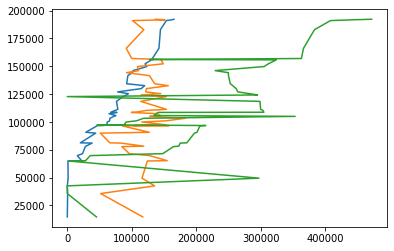

In [5]:
import matplotlib.pyplot as plt
plt.plot(x, y);

#GP

In [6]:
!pip install deap

In [7]:
# Importar bibliotecas
import operator
import math
import random
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

In [8]:
# Definir funções

def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 3)   # nome do procedimento a ser gerado e o número de argumentos
pset.addPrimitive(operator.add, 2)  # funções e o número de argumentos
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(np.sin, 1) # adicionado o seno
pset.addEphemeralConstant("rand101", lambda: random.randint(-10,10))

In [9]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))                     # Minimização do erro
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)      # indivíduo

In [10]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)                  # metade genfull (toda folha tem a mesma profundidade entre min e max) metade genGrow (folhas podem ter profundidades diferente entre min e max).
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [11]:
# Função de avaliação
def evaluation(individual):
    # Transforma a expressão em árvore em uma função que pode ser chamada
    func = toolbox.compile(expr=individual)
    # Avalia o erro (MSE) entre a expressão gerada e o resultado real da função
    error = 0
    for idx  in range(len(x)):
      error += (func(x[idx][0],x[idx][1],x[idx][2]) - y[idx])**2 
    return error,

In [12]:
# operadores
toolbox.register("evaluate", evaluation)                          # avaliação
toolbox.register("select", tools.selTournament, tournsize=3)      # seleção
toolbox.register("mate", gp.cxOnePoint)                           # crossover
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)          
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))     #limites para crossover
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))   # limites para mutação

In [13]:
random.seed(1)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)

pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.1, 40,  halloffame=hof, verbose=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
<string>:1: RuntimeWarning: invalid value encountered in double_scalars
<string>:1: RuntimeWarning: invalid value encountered in sin


In [14]:
# Função encontrada
for i in hof:
  print(i)

add(add(protectedDiv(ARG1, 3), ARG0), protectedDiv(add(protectedDiv(protectedDiv(ARG1, -7), protectedDiv(add(protectedDiv(add(protectedDiv(protectedDiv(ARG1, -7), protectedDiv(add(protectedDiv(ARG1, 3), ARG0), ARG2)), ARG0), 3), ARG0), ARG2)), ARG0), sub(-7, 3)))


In [15]:
# compila função para testarmos
gp_func = toolbox.compile(expr=hof[0])

In [16]:
# calcula y pela função gerada pelo gp
y_hat=[]
for i in x:
  y_hat.append(gp_func(i[0], i[1], i[2]))
y_hat

[198928.24117695252,
 201554.56090667273,
 174849.47290703503,
 173087.13821461692,
 161012.89485442385,
 155089.1742436007,
 171758.27630685974,
 169955.94149892512,
 162542.0334055568,
 150291.4349621221,
 131433.0921837337,
 123802.53980990544,
 130902.32217068045,
 132373.32570314588,
 163986.26705859986,
 147153.2355048624,
 115784.599912554,
 138753.61590223564,
 125006.72516234704,
 131142.15871428573,
 112137.073366154,
 129325.76687737824,
 113915.19776176289,
 102159.48192402803,
 104495.39712021772,
 108243.3666599111,
 118809.88062102336,
 115853.51583509338,
 124182.94713963216,
 112955.17156474214,
 96280.51045866014,
 108462.57323456807,
 101180.14941247037,
 89371.79591564489,
 104691.62375802241,
 74739.82591843276,
 85464.92212200676,
 59593.60075483699,
 53422.084371334364,
 67427.10498306979,
 77561.3626101259,
 61185.63386741962,
 63849.589156511596,
 60229.53843013729,
 73905.48497137739,
 45446.184218861825,
 27278.457509627988,
 47076.97695238096,
 18474.7495238

In [17]:
# calcula o erro quadrático
error = 0
for idx, point in enumerate(x):
  error += (gp_func(point[0], point[1], point[2]) - y[idx])**2
error

9292939238.154867

In [18]:
from sklearn.metrics import r2_score
r2_score(y, y_hat)

0.8832616017457426

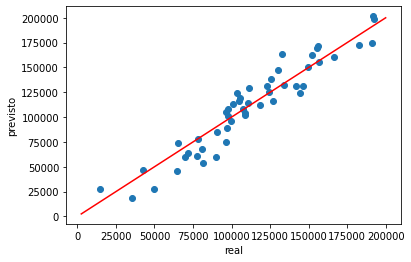

In [19]:
# plota a comparação
import matplotlib.pyplot as plt
plt.scatter(y, y_hat)
plt.xlabel('real')
plt.ylabel('previsto')

a = [2500, 200000]
plt.plot(a,a, color='red')